# CP2K - H2O-256

Results from the [CP2K](https://www.cp2k.org/) quantum chemistry and solid state physics package for atomistic simulations using the H20-256 benchmark distributed with the source code.

In [5]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes

The plots below are for the most-recent test on each system/partition/environment combination. They plot the wallclock time in seconds vs. the number of nodes used for each run. Lower values are better performance.

Each test uses 1 task per (hardware) core.


Cp2k_H2O_256_*: runtime_real


case,alaska-ib-openmpi4-ucx-cp2k,alaska-roce-openmpi4-ucx-cp2k
n_nodes,,
1,616.404,651.000
2,493.092,482.429
4,325.795,324.613
8,202.868,225.339
16,148.672,153.338


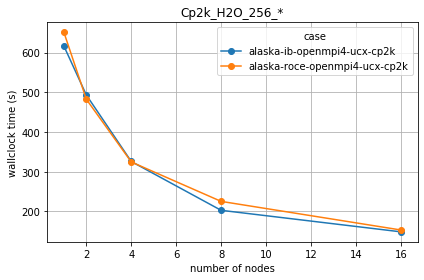

In [9]:
for test in ['Cp2k_H2O_256_*']:
    
    # load perf records:
    perf_records = modules.utils.load_perf_logs('../../perflogs', test, '.log')
    
    # calculate number of nodes:
    perf_records['n_nodes'] = [int(tn.rsplit('_')[-1]) for tn in perf_records['testname']]
    
    # plot/tabulate:
    perf_var = 'runtime_real'
    table = modules.plots.tabulate_last_perf_vs(perf_records, 'n_nodes', perf_var)
    ax = table.plot(grid=True, style='o-')
    ax.set_xlabel('number of nodes')
    ax.set_ylabel('wallclock time (s)')
    ax.set_title(test)
    plt.tight_layout()
    print()
    print('%s: %s' % (test, perf_var))
    display(HTML(table.to_html()))
